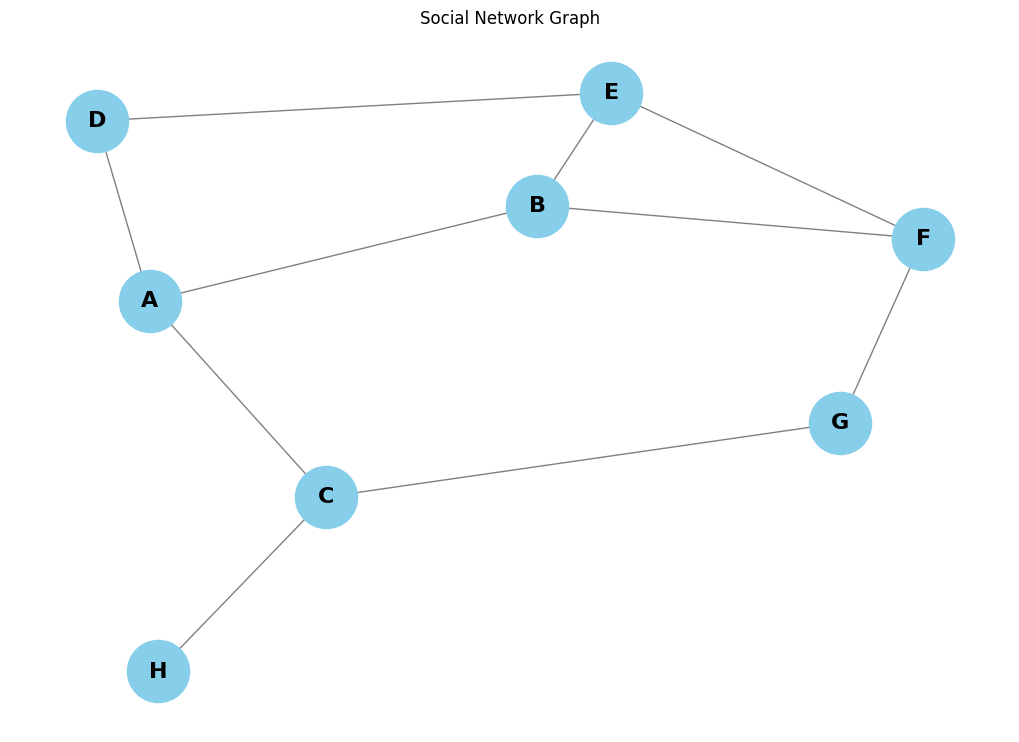

Centrality Metrics:
     Degree  Betweenness  Closeness
A  0.428571     0.301587   0.636364
B  0.428571     0.103175   0.583333
C  0.428571     0.357143   0.583333
D  0.285714     0.055556   0.500000
E  0.428571     0.095238   0.500000
F  0.428571     0.150794   0.583333
G  0.285714     0.126984   0.538462
H  0.142857     0.000000   0.388889

Most central metric: Closeness
Nodes with highest Closeness centrality:
A

Detected Communities:
Community 1: {'D', 'A'}
Community 2: {'B', 'F', 'E'}
Community 3: {'G', 'H', 'C'}


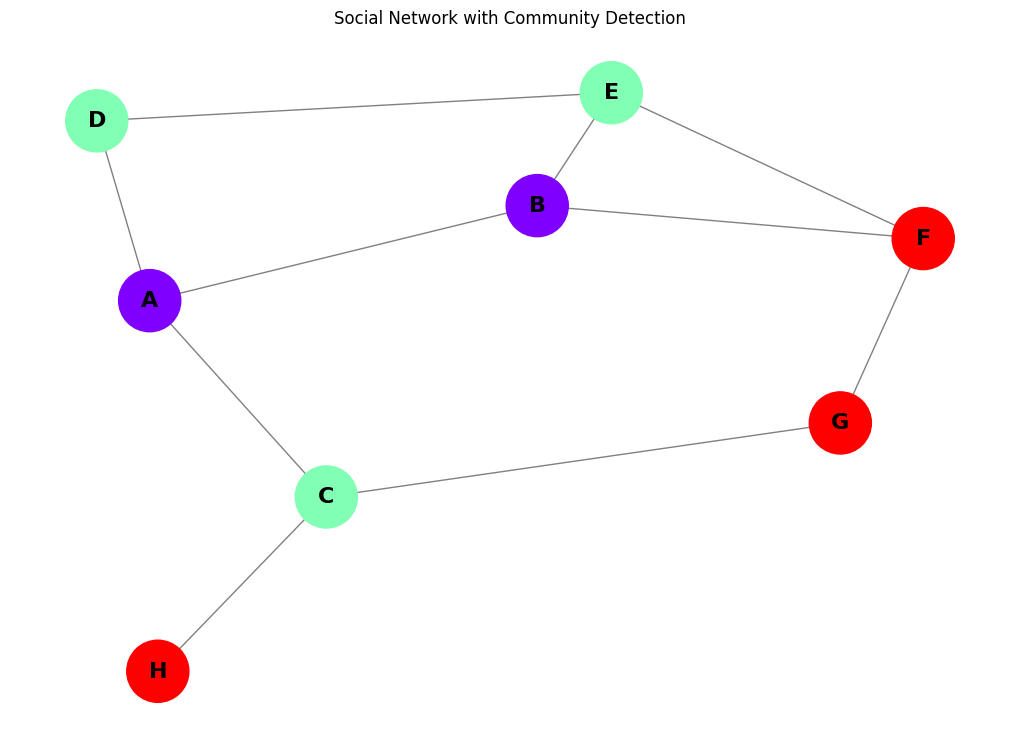

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a synthetic social network graph
G = nx.Graph()

# Add nodes with attributes
nodes = {
    'A': {'role': 'friend'},
    'B': {'role': 'friend'},
    'C': {'role': 'friend'},
    'D': {'role': 'friend'},
    'E': {'role': 'friend'},
    'F': {'role': 'friend'},
    'G': {'role': 'friend'},
    'H': {'role': 'friend'},
}

G.add_nodes_from(nodes.keys())

# Add edges to represent connections
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'), ('B', 'F'),
    ('C', 'G'), ('C', 'H'),
    ('D', 'E'), ('E', 'F'), ('F', 'G')
]

G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=16, font_weight='bold')
plt.title('Social Network Graph')
plt.show()

#### **2. Analyze Node Centrality**

# Compute centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a DataFrame to display centralities
centralities = pd.DataFrame({
    'Degree': degree_centrality,
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality
})

print("Centrality Metrics:")
print(centralities)

# Find the most central node
most_central_node = centralities.mean().idxmax()
print(f"\nMost central metric: {most_central_node}")
print(f"Nodes with highest {most_central_node} centrality:")
print(centralities[most_central_node].idxmax())

#### **3. Community Detection**

from networkx.algorithms import community

# Detect communities using the Louvain method
communities = community.louvain_communities(G, seed=42)

# Print detected communities
print("\nDetected Communities:")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {community}")

# Draw the graph with communities
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
colors = [i for i, com in enumerate(communities) for node in com]
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=2000, edge_color='gray', font_size=16, font_weight='bold')
plt.title('Social Network with Community Detection')
plt.show()